In [3]:
library("ggplot2")
library("dplyr",warn.conflicts=FALSE)
set.seed(1234)

## R exercises
# Set n# 3

### Exercise 1

The triangular distribution, in the interval $(a,b)$, is given by the following

$$
f(X) = 
\begin{cases}
\frac{2(x-a)}{(b-a)(c-a)}  & a \leq x < c \\
\frac{2(b-x)}{(b-a)(b-c)}  & c \leq x \leq b \\
0 & otherwise


\end{cases}
$$

#### a) plot the function, given the interval $(a,b)$

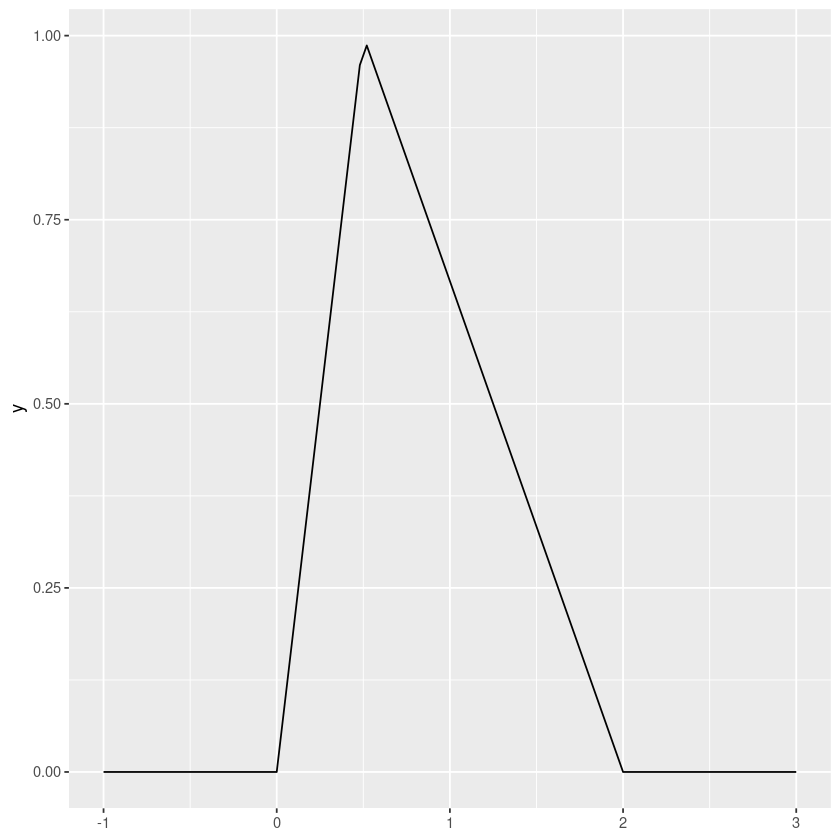

In [4]:
triangular_pdf <- function(x,a,b,c) {
    return(case_when(
        x >= a & x < c ~ (2*(x-a))/((b-a)*(c-a)),
        x >= c & x<= b ~ (2*(b-x))/((b-a)*(b-c)),
        x < a | x > b ~ 0
    ))
}

a <- 0
b <- 2
c <- 0.5

p1 <- ggplot() + xlim(-1,3) + geom_function(fun=triangular_pdf,args=c(a,b,c))
p1

#### b) and write an algorithm to generate random numbers from the triangular distribution

to do that we will need the inverse CDF function. First, let's calculate the CDF function from the analytic definition:

$$
CDF(x) = \int_{-\infty}^x f(x') dx' = 
\begin{cases}
0 & x< a \\
\frac{(x-a)^2}{(b-a)(c-a)} &  a \leq x < c \\ 
\frac{(c-a)^2}{(b-a)(c-a)} - \frac{(b-x)^2}{(b-a)(b-c)} + \frac{(b-c)^2}{(b-a)(b-c)}  & c \leq x<b \\
1 & x\geq b

\end{cases}
$$


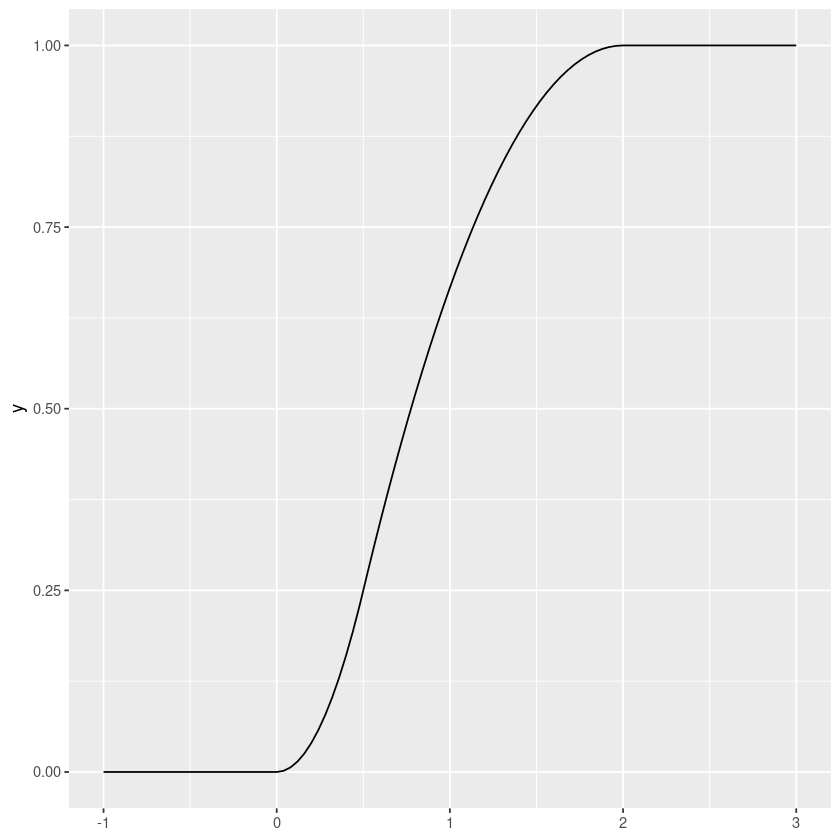

In [5]:
triangular_cdf <- function(x,a,b,c){
    return(
        case_when(
            x < a ~ 0,
            x >= a & x < c ~ ((x-a)^2)/((b-a)*(c-a)),
            x >= c & x < b ~ ((c-a)^2)/((b-a)*(c-a)) - ((b-x)^2)/((b-a)*(b-c)) +((b-c)^2)/((b-a)*(b-c)),
            x >= b ~ 1
        )
    )
}

p2 <- ggplot() + xlim(-1,3) + geom_function(fun=triangular_cdf,args=c(a,b,c))
p2

Then we need to invert it in order to find the quantile function. Since $f(c) = (c-a)^2 / (b-a)(c-a)$, we have

$$
CDF^-1 (p) = 
\begin{cases}
 a + \sqrt{(a-b)(a-c)p} \;\;\;\;\;  & 0\leq p < \tfrac{(c-a)^2}{(b-a)(c-a)} \\
 b - \sqrt{(p-1)(a-b)(b-c)}  & \tfrac{(c-a)^2}{(b-a)(c-a)} \leq p \leq 1
\end{cases}
$$



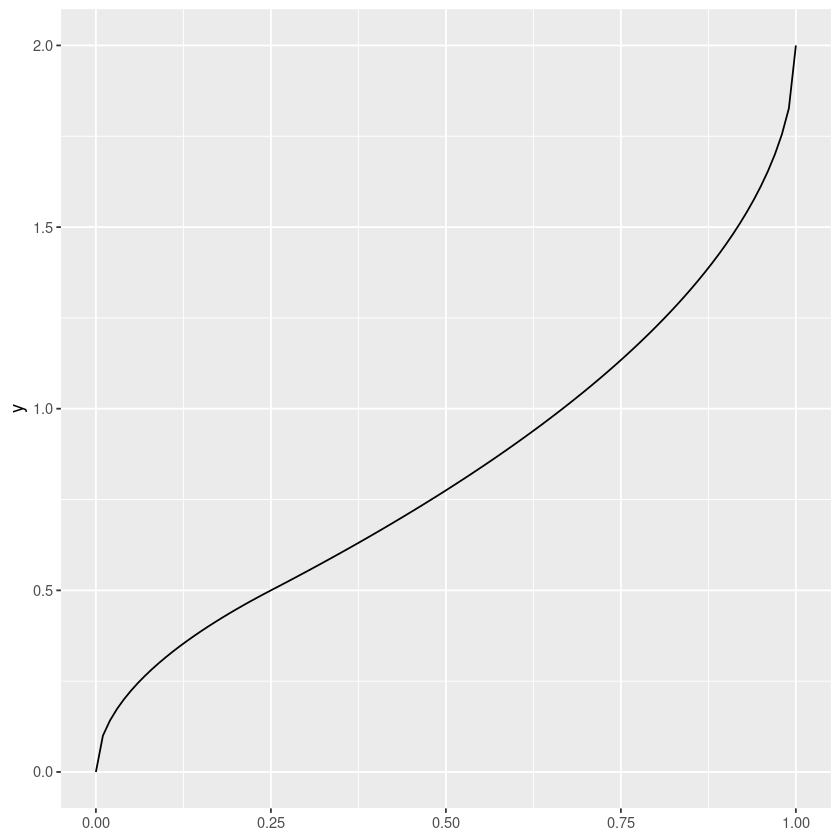

In [6]:
triangular_quant <- function(p,a,b,c) {
    f_c = ((c-a)^2)/((b-a)*(c-a))
    return(
        case_when(
            0 <= p & p <=  f_c ~ a + ((a-b)*(a-c)*p)^(0.5),
            f_c < p & p <= 1 ~ b - ((p-1)*(a-b)*(b-c))^(0.5)
        )
    )
}

p3 <- ggplot() + xlim(0,1) + geom_function(fun=triangular_quant,args=c(a,b,c))
p3


Finally we can code the random extraction function:

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


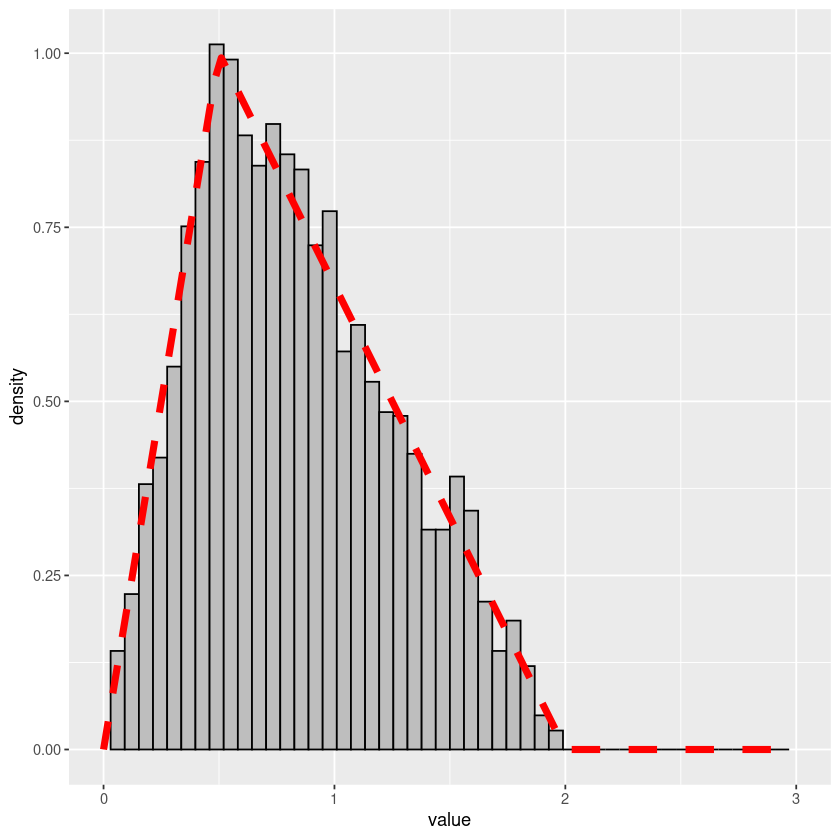

In [7]:
triangular_r <- function(n,a,b,c) {
    return(triangular_quant(runif(n),a,b,c))
}

N <- 3000
extractions <- data.frame(value=triangular_r(N,a,b,c))
plot_extraction <- ggplot(extractions,aes(x=value)) + xlim(0,3)  + geom_histogram(aes(y=..density..),bins=50,color="black",fill='gray') + geom_function(fun=triangular_pdf,args=c(a,b,c),linetype="dashed",color='red',size=2)
plot_extraction

### Exercise 2

Markov’s inequality represents an upper bound to probability distributions:

$$
P(X \geq k) \leq \frac{E[X]}{k} \;\; \forall \;\; k\geq 0
$$

having defined a function

$$
G(k) = 1 - F(k) \equiv P(X\geq k)
$$

plot $G(k)$ and the Markov's upper bound for 

a) the exponential, Exp(λ =1), distribution function

b) the uniform, U(3,5), distribution function

c) the binomial, Bin(n =1,p =1/2), distribution function

d) a Poisson, Pois(λ =1/2), distribution function

a) the exponential distribution $P(x) = \lambda e^{-\lambda x}$ has expected value $E[x]=1/\lambda$, hence

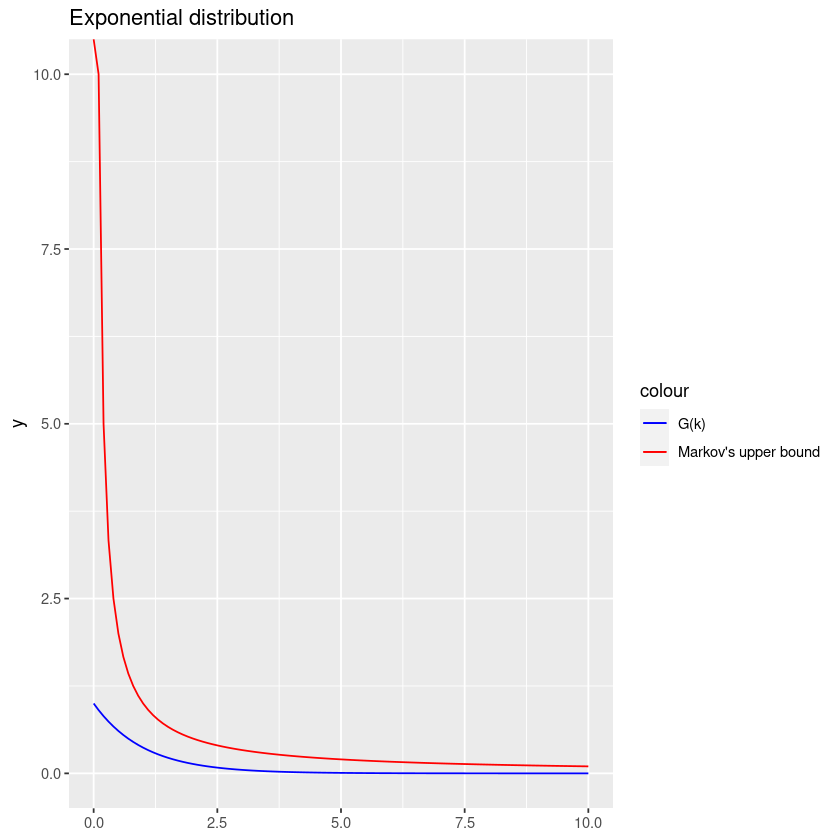

In [8]:
fun <- function (k,lambda) {return(1-pexp(k,lambda))} # basically 1 - e^(-lambda * x)
mark <- function(k,lambda) {return((1/lambda)/k)}
lambda <- 1
p1 <- ggplot() + labs(title="Exponential distribution") + xlim(0,10) + geom_function(fun=fun,aes(col="G(k)"),args=c(lambda)) + geom_function(fun=mark,aes(col="Markov's upper bound"),args=c(lambda))+scale_colour_manual(values=c("blue","red"))
p1

b) for the uniform distribution $P(x)=1/(b-a)$ with $(a,b)=(3,5)$ we have $E[X]=\tfrac{1}{2}(a+b)$

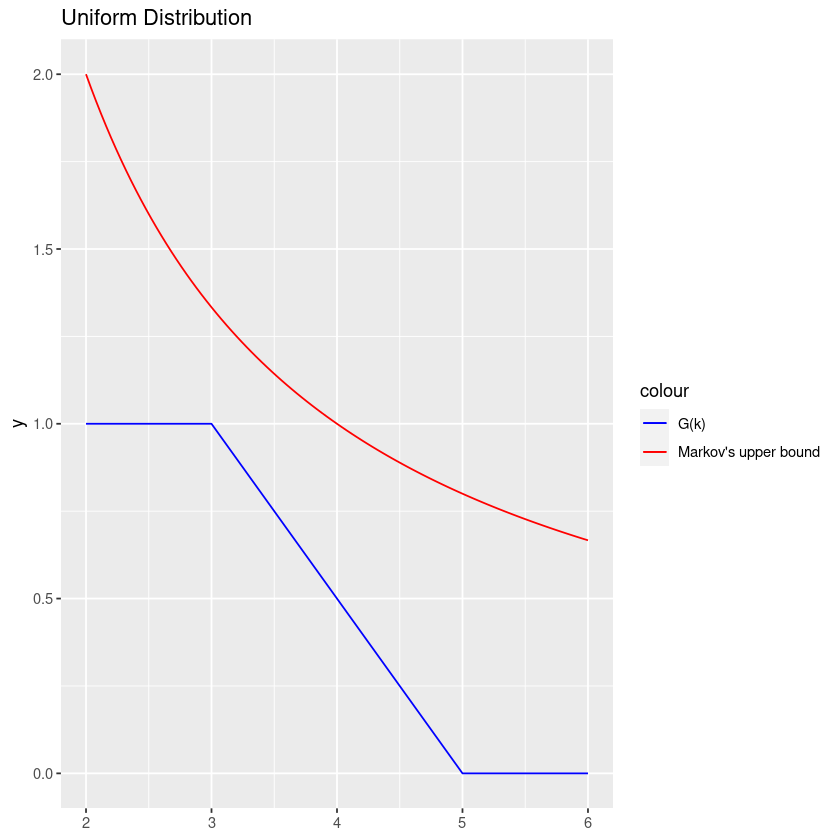

In [9]:
fun <- function (k,a,b) {return(1-punif(k,a,b))} 
mark <- function(k,a,b) {return((0.5*(a+b))/k)}
a <- 3
b <- 5

p2 <- ggplot() + labs(title="Uniform Distribution") + xlim(2,6) + geom_function(fun=fun,aes(col="G(k)"),args=c(a,b)) + geom_function(fun=mark,aes(col="Markov's upper bound"),args=c(a,b))+scale_colour_manual(values=c("blue","red"))
p2

3) Binomial: $P_N(k) = \binom{N}{k} p^k (1-p)^{n-k}$ with $(p,n)=(1/2,1)$ becomes $P_1(k) = \frac{1}{2}$ for $k=0,1$
So $E[k]=1/2$

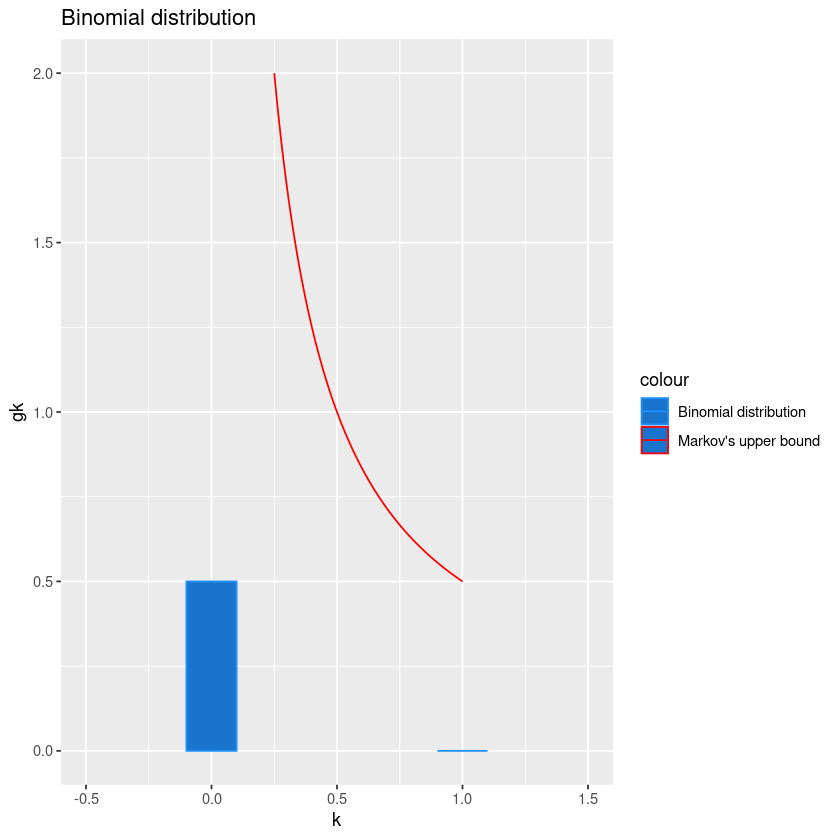

In [10]:
dfk <- data.frame(k=c(0,1),pk=c(0.5,0.5),gk=c(0.5,0))
mark <- function (k) {return(0.5/k)}


p3 <- ggplot(data=dfk,aes(x=k,y=gk)) +labs(title="Binomial distribution") + xlim(-0.5,1.5) + ylim(0,2) + geom_bar(stat="identity",aes(col="Binomial distribution"),width=0.2,fill='dodgerblue3') + stat_function(fun=mark,aes(col="Markov's upper bound"),geom='line',xlim=c(0,1))+scale_colour_manual(values=c("dodgerblue","red"))
p3

d) Poisson: $P_\lambda(n) = \frac{\lambda^n}{n!}e^{-\lambda}=\frac{1}{2^n n! \sqrt{e}}$, we have $E[n]=\lambda=\frac{1}{2}$

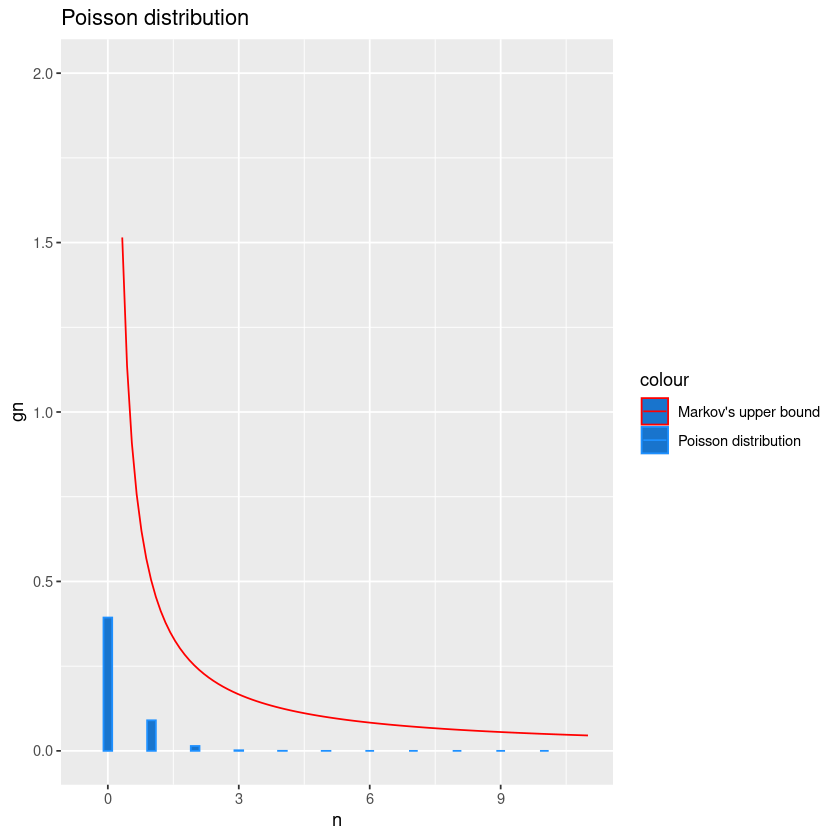

In [11]:
lambda=0.5
dfp <- data.frame(n=0:10,dn=dpois(0:10,lambda),pn=ppois(0:10,lambda),gn=1-ppois(0:10,lambda))
mark <- function (k) {return(0.5/k)}

p4 <- ggplot(data=dfp,aes(x=n,y=gn)) +labs(title="Poisson distribution") + xlim(-0.5,11) + ylim(0,2) + geom_bar(stat="identity",aes(col="Poisson distribution"),width=0.2,fill='dodgerblue3') + stat_function(fun=mark,aes(col="Markov's upper bound"),geom='line',xlim=c(0,11))+scale_colour_manual(values=c("red","dodgerblue"))
p4

### Exercise 3

Chebyshev’s inequality tell us that

$$
P(|X-\mu|\geq k\sigma) \leq \frac{1}{k^2}
$$

which can also be written as

$$
P(|X-\mu| < k\sigma ) \geq 1 - \frac{1}{k^2}
$$

use R to show, with a plot, that Chebyshev’s inequality is is an upper bound to the
following distributions:


a) a normal distribution, $N(\mu = 3, \sigma = 5)$

The Chebyshev inequality tells us that no more than a certain fraction $1/k^2$ of samples are more than $k\sigma$ further away from the mean; the probability of being more than $k\sigma$ away from the mean is, in general, $1-CDF(\mu + k\sigma) + CDF(\mu - k\sigma)$. For the normal distribution:

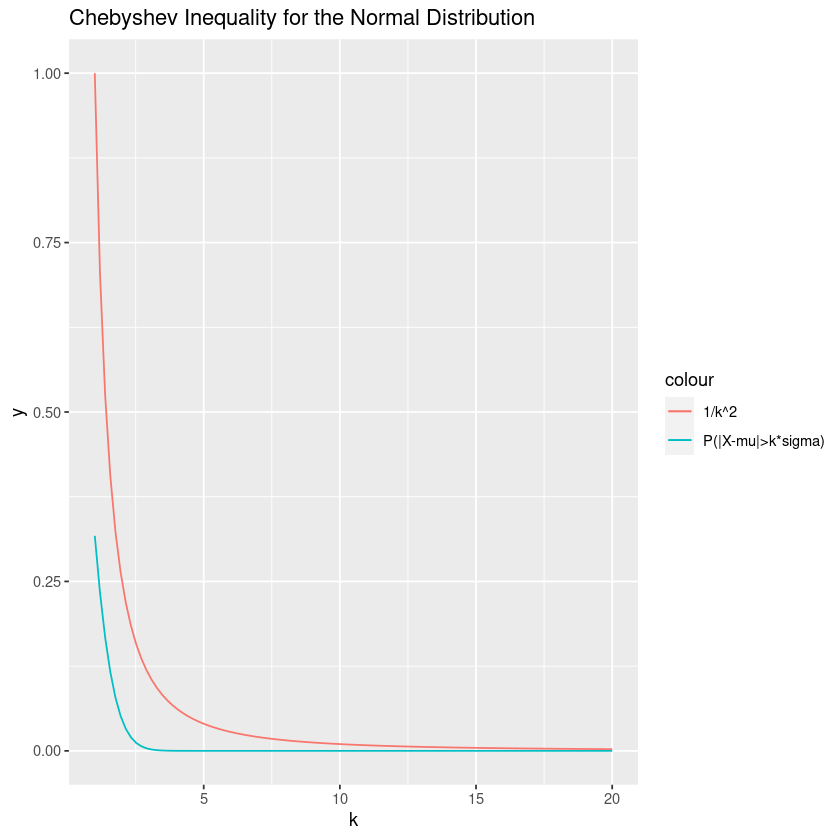

In [12]:
upper_bound <- function(k) {
    return(k^(-2))
}


mu <- 3 # we could also just look at cdf(+-ksigma) and deal with a mu=0 normal distribution
sigma <- 5

p_k_norm <- function(k,mu,sigma) {
    return(1-pnorm(mu+k*sigma,mean=mu,sd=sigma)+pnorm(mu-k*sigma,mean=mu,sd=sigma))
}   
    

p1 <- ggplot()  + labs(x='k',title='Chebyshev Inequality for the Normal Distribution') + geom_function(fun=upper_bound,aes(col='1/k^2')) + geom_function(fun=p_k_norm,args=c(mu,sigma),aes(col='P(|X-mu|>k*sigma)'))
p1 <- p1 + xlim(1,20) # we are only plotting k>1 because otherwise the inequality is trivial (every probability is less than 1)
p1

b) an exponential distribution, $Exp(\lambda = 1)$

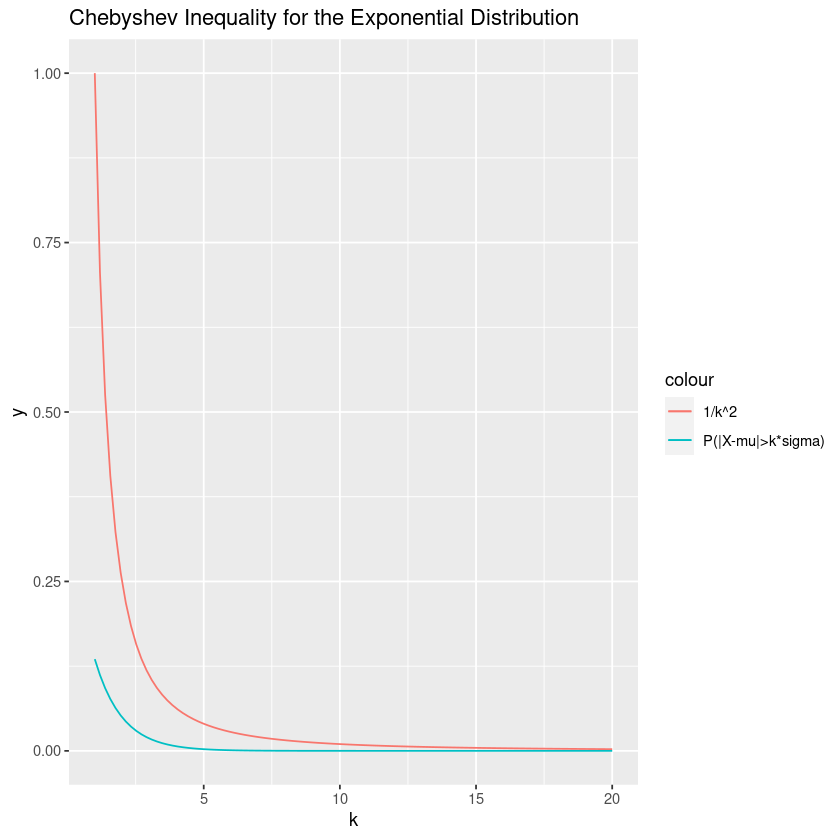

In [13]:
lambda <- 1
p_k_exp <- function(k,lambda) { # mean value is 1/lambda, and variance is 1/lambda^2 so the std is equal to the mean
    return(1-pexp((1/lambda)*(1+k),rate=lambda)+pexp((1/lambda)*(1-k),rate=lambda))
}

p2 <- ggplot()  + labs(x='k',title='Chebyshev Inequality for the Exponential Distribution') + geom_function(fun=upper_bound,aes(col='1/k^2')) + geom_function(fun=p_k_exp,args=lambda,aes(col='P(|X-mu|>k*sigma)'))
p2 <- p2 + xlim(1,20)
p2


c) a uniform distribution $U(1-\sqrt{2},1+\sqrt{2})$

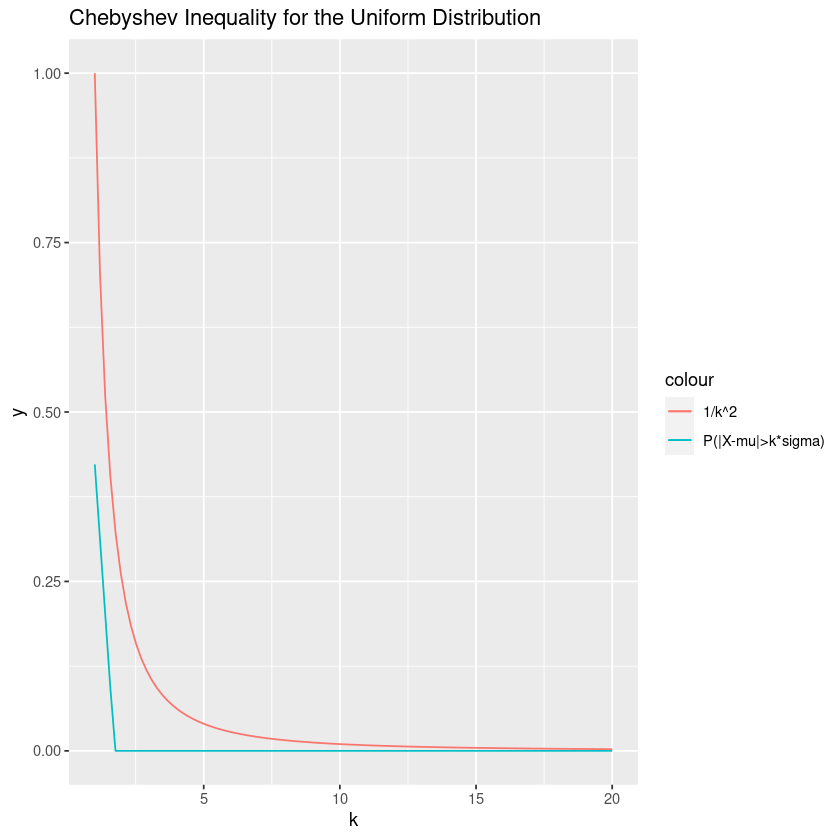

In [14]:
a <- 1 - 2^(0.5)
b <- 1 + 2^(0.5)

p_k_unif <- function(k,a,b) { # mean value is (a+b)/2, and variance is 1/12 * (b-a)^2 
    mean <- (a+b)/2
    std <- (b-a)/(2*(3^0.5))
    return(1 - punif(mean + k*std,min=a,max=b) + punif(mean - k*std,min=a,max=b))
}

p3 <- ggplot()  + labs(x='k',title='Chebyshev Inequality for the Uniform Distribution') + geom_function(fun=upper_bound,aes(col='1/k^2')) + geom_function(fun=p_k_unif,args=c(a,b),aes(col='P(|X-mu|>k*sigma)'))
p3 <- p3 + xlim(1,20)
p3

d) a Poisson, $Pois(λ = 1/3)$, distribution function

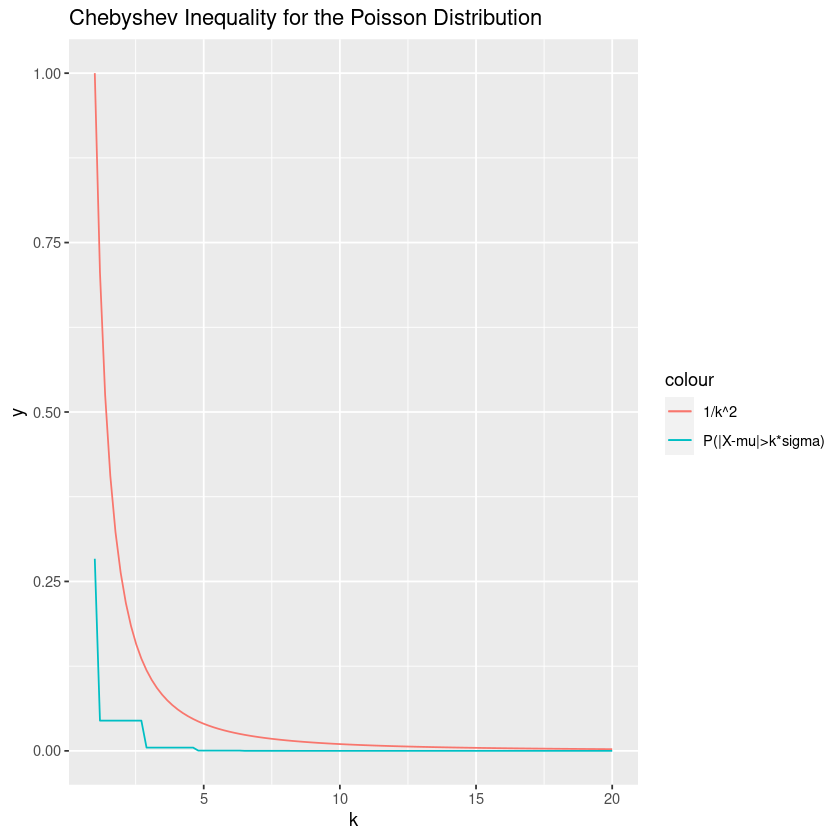

In [15]:
lambda <- 1/3

p_k_pois <- function(k,lambda) { # mean value is lambda, var is lambda so std is lambda^0.5
    return(1 - ppois(lambda + k*lambda^0.5,lambda) + punif(lambda - k*lambda^0.5,lambda))
}

p4 <- ggplot()  + labs(x='k',title='Chebyshev Inequality for the Poisson Distribution') + geom_function(fun=upper_bound,aes(col='1/k^2')) + geom_function(fun=p_k_pois,args=lambda,aes(col='P(|X-mu|>k*sigma)'))
p4 <- p4 + xlim(1,20)
p4

### Exercise 4

Labeling the boxes as follows:

<img src="./boxes.png" width=800>

write a program in R that:

1. allows the user to insert the color of a randomly extracted box (_stone?_) and
3. prints on the standard output the probability of selecting each box
4. plots the probability for each box as a function of the extraction step

The crucial step is computing the Bayesian update of our probability distribution $P(H_j|I_n)$ after some extraction. To do that, we implement a function that takes an array of probabilities $P(H_j|I_{n-1})$, an extraction result $E^{(n)}$, and calculates 
$$
P(H_j|I_n) = \frac{P(E^{(n)}|H_j I_{n-1})P(H_j | I_{n-1})}{\sum_l P(E^{(n)}|H_l I_{n-1})P(H_l | I_{n-1})}
$$

using the known probabilities $P(E_w^{(n)}|H_j) = \frac{j}{5}$ and its Bernoulli counterpart $P(E_b^{(n)}|H_j) = 1 - P(E_w^{(n)}|H_j)$

In [16]:
bayesian_update <- function (p_hj, color) { # function takes in a prior probability distribution, and the color of the extraction (either 0 or 1)
    N <- length(p_hj) -1
    pwj <- 0:N/N # compute probability of drawing a white stone from the j box
    pbj <- 1 - pwj

    if (color == 0) { # black
        x <- pbj * p_hj
        p_hj_next <- x/sum(x) # bayesian update
        p_ew_next <- pwj %*% p_hj_next  # the probability that the next draw will be a white
        return(c(p_hj_next,p_ew_next))
    }
    else if (color == 1) { # white
        x <- pwj * p_hj
        p_hj_next <- x/sum(x) # bayesian update
        p_ew_next <- pwj %*% p_hj_next  # the probability that the next draw will be a white
        return(c(p_hj_next,p_ew_next))
    }
    else {
        print("Please provide either a 0 (black) or 1 (white) observation.")
    }
}


Now, we test it out by passing it a made up list of extractions:

In [17]:
build_table <- function(observations) { # this function takes an observations array like c(0,0,1,0,1,...)
    
    p_hj_0 <- c(1,1,1,1,1,1)/6 # initial probability
    N <- length(observations)
    df <- data.frame(matrix(NA,nrow = N,ncol = 8))
    colnames(df) <- c("Result","pH0","pH1","pH2","pH3","pH4","pH5","pEW")
    df[1,2:7] <- p_hj_0
    df[1,8] <- 0.5

    for (i in 1:N+1) {
        df[i,1] <- observations[i-1] 
        update <- bayesian_update(p_hj_0,observations[i-1]) 
        p_hj_0 <- update[1:6]      
        df[i,2:7] <- update[1:6] 
        df[i,8] <- update[7]
    }

    df$Result[df$Result == 0] <- "B" # black
    df$Result[df$Result == 1] <- "W" # white
    df$Trial <- 1:(N+1)

    return(df)
}

# test it with sampling from slides

obs <- c(0,0,0,0,0,0,0,0,0,0,0,0,0,1)
df <- build_table((obs))
df

,Result,pH0,pH1,pH2,pH3,pH4,pH5,pEW,Trial
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,NA,0.1666667,0.16666667,0.166666667,1.666667e-01,1.666667e-01,0.1666667,0.50000000,1
2,B,0.3333333,0.26666667,0.200000000,1.333333e-01,6.666667e-02,0.0000000,0.26666667,2
3,B,0.4545455,0.29090909,0.163636364,7.272727e-02,1.818182e-02,0.0000000,0.18181818,3
4,B,0.5555556,0.28444444,0.120000000,3.555556e-02,4.444444e-03,0.0000000,0.12977778,4
5,B,0.6384065,0.26149132,0.082737487,1.634321e-02,1.021450e-03,0.0000000,0.09601634,5
6,B,0.7062147,0.23141243,0.054915254,7.231638e-03,2.259887e-04,0.0000000,0.07276836,6
7,B,0.7616378,0.19965879,0.035534974,3.119669e-03,4.874482e-05,0.0000000,0.05605654,7
8,B,0.8068681,0.16921250,0.022587142,1.321973e-03,1.032791e-05,0.0000000,0.04367880,8
9,B,0.8437208,0.14155286,0.014171269,5.529408e-04,2.159925e-06,0.0000000,0.03431257,9


And finally we plot the behaviour of $P(H_j|I_n)$ as the number $n$ of trials grows:

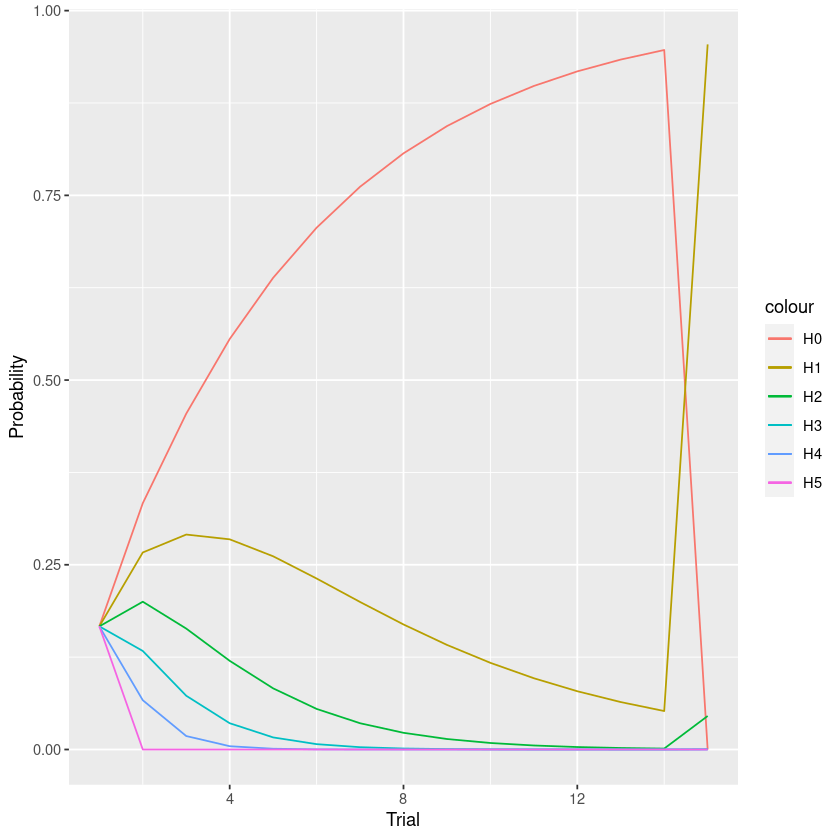

In [18]:
plot <- ggplot(data=df) + geom_line(aes(x=Trial,y=pH0,col='H0')) + geom_line(aes(x=Trial,y=pH1,col='H1'))+ geom_line(aes(x=Trial,y=pH2,col='H2')) 
plot <- plot + geom_line(aes(x=Trial,y=pH3,col='H3')) + geom_line(aes(x=Trial,y=pH4,col='H4')) + geom_line(aes(x=Trial,y=pH5,col='H5')) + labs(y='Probability')
plot

### Exercise 5

consider again the six boxes toy model of the previous exercise and write a simulation program that:

1. selects a random box
2. makes random sampling from the box
3. prints on the standard output the probability of selecting each box
4. plots the probability for each box as a function of the number of trial

In order to simulate `n` extractions from one of the boxes, we simply run `n` Bernoulli trials with a probability of success given by the box we chose.
For instance, let's say we choose the box $H_2$, containing 2 white stones: that would imply a probability $P(E_w|H_2) = \frac{2}{5} = 0.4$

In [19]:
n <- 100 # extractions
extractions <- rbinom(n,1,0.4)
extractions[1:10]

[1] 1 0 0 0 0 0 0 1 0 1

Now, we give these observations to the functions we previously coded to build a dataframe of updated probabilities:

In [20]:
df_sim <- build_table(extractions)
head(df_sim)

,Result,pH0,pH1,pH2,pH3,pH4,pH5,pEW,Trial
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,NA,0.1666667,0.16666667,0.1666667,0.1666667,0.166666667,0.1666667,0.5000000,1
2,W,0.0000000,0.06666667,0.1333333,0.2000000,0.266666667,0.3333333,0.7333333,2
3,B,0.0000000,0.20000000,0.3000000,0.3000000,0.200000000,0.0000000,0.5000000,3
4,B,0.0000000,0.32000000,0.3600000,0.2400000,0.080000000,0.0000000,0.4160000,4
5,B,0.0000000,0.43835616,0.3698630,0.1643836,0.027397260,0.0000000,0.3561644,5
6,B,0.0000000,0.54468085,0.3446809,0.1021277,0.008510638,0.0000000,0.3148936,6


And finally we plot the behaviour of the probabilities $P(H_j)$ as the number of trials grows as we did before:

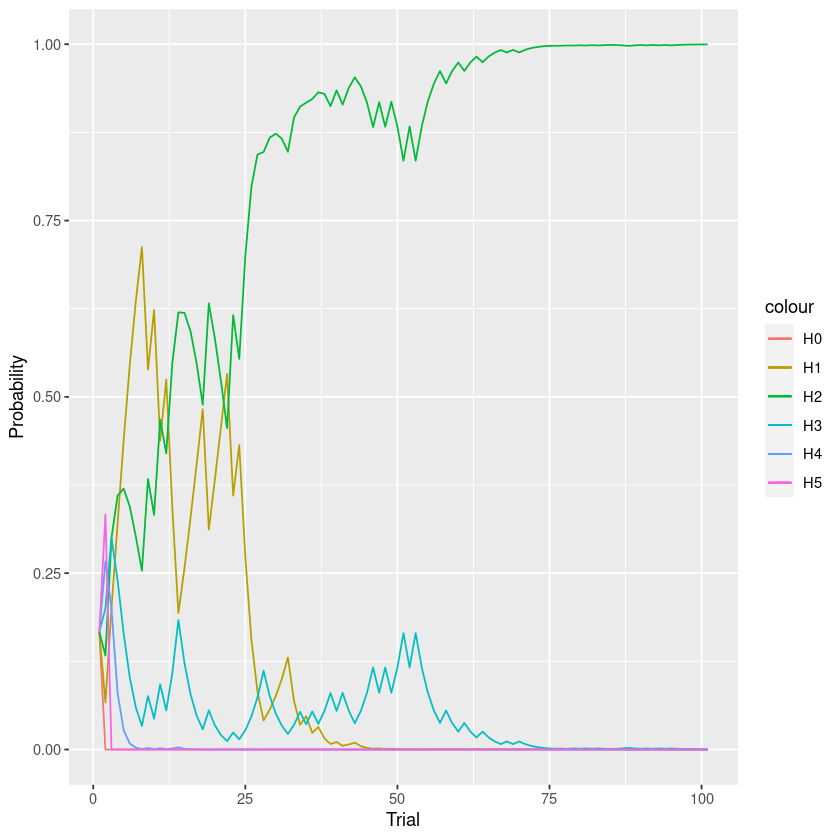

In [21]:
plot <- ggplot(data=df_sim) + geom_line(aes(x=Trial,y=pH0,col='H0')) + geom_line(aes(x=Trial,y=pH1,col='H1'))+ geom_line(aes(x=Trial,y=pH2,col='H2')) 
plot <- plot + geom_line(aes(x=Trial,y=pH3,col='H3')) + geom_line(aes(x=Trial,y=pH4,col='H4')) + geom_line(aes(x=Trial,y=pH5,col='H5')) + labs(y='Probability')
plot

It is also interesting to observe how the probability of extracting a white stone converges to $2/5$:

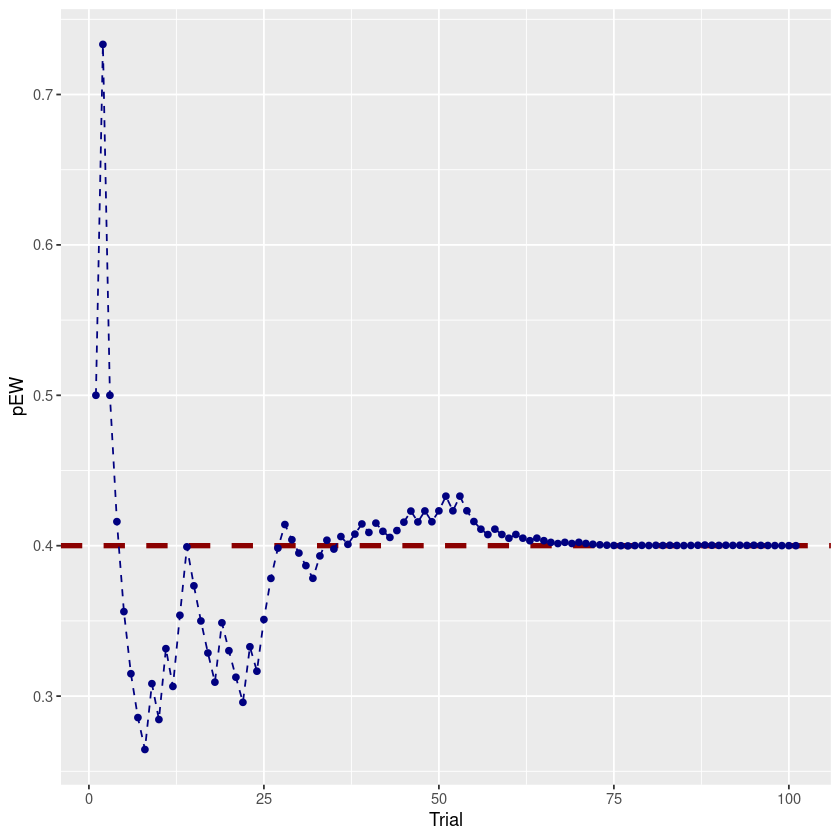

In [22]:
plot2 <- ggplot(data=df_sim,aes(x=Trial,y=pEW)) + geom_hline(yintercept=0.4,color='darkred',size=1.5,linetype='dashed') + geom_line(color='navy',linetype='dashed') + geom_point(color='navy') 
plot2